In [266]:
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm

sns.set()
pd.set_option('display.max_columns', None)

# 1. The HR Dataset
Load the dataset from a csv file.

In [267]:
# Load the csv dataset into pandas dataframes
data_file = os.path.join(os.getcwd(), 'dataset', 'hr_employee_attrition.csv')
hr_df = pd.read_csv(data_file)
hr_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [268]:
hr_df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


All rows have values for each column. Therefore, there's no need to drop any rows.

In [269]:
hr_df.columns[hr_df.isna().any()].tolist()

[]

Upon inspection, column ```Over18``` has values that are all 'Y'. A good assumption would be that a person has to be 18 years old at the minimum to be employed. Initially, this can be considered uselss. However, I retained this for the following reasons:  
1. Country - There are some countries where the legal minimum working age is lower than 18 (e.g. 15 for Japan). This dataset did not indicate which countries the employees are from.
2. Live Production Data - This dataset is a snippet in its current form. However, if production data is always extracted, there will always be a possibility that the opposite value, 'N', would appear.
3. Interns - While not present in the dataset, interns can be below 18 years old. In addition, every employer keeps records of their interns as they're still considered employees.

In [270]:
hr_df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

Column ```EmployeeCount``` contains a single value as well. However, this column does not make sense at all so I removed this one.

In [271]:
hr_df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [272]:
hr_df.drop(['EmployeeCount'], axis=1, inplace=True)

Column ```StandardHours``` contains nly one value which is 80. There is a possibility that in the future, there will be a new value. However, at present, we cannot invent rows with say, 88, without considering other variables. There, this column needs to be dropped.

In [273]:
hr_df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [274]:
hr_df.drop(['StandardHours'], axis=1, inplace=True)

# Exploring the Data

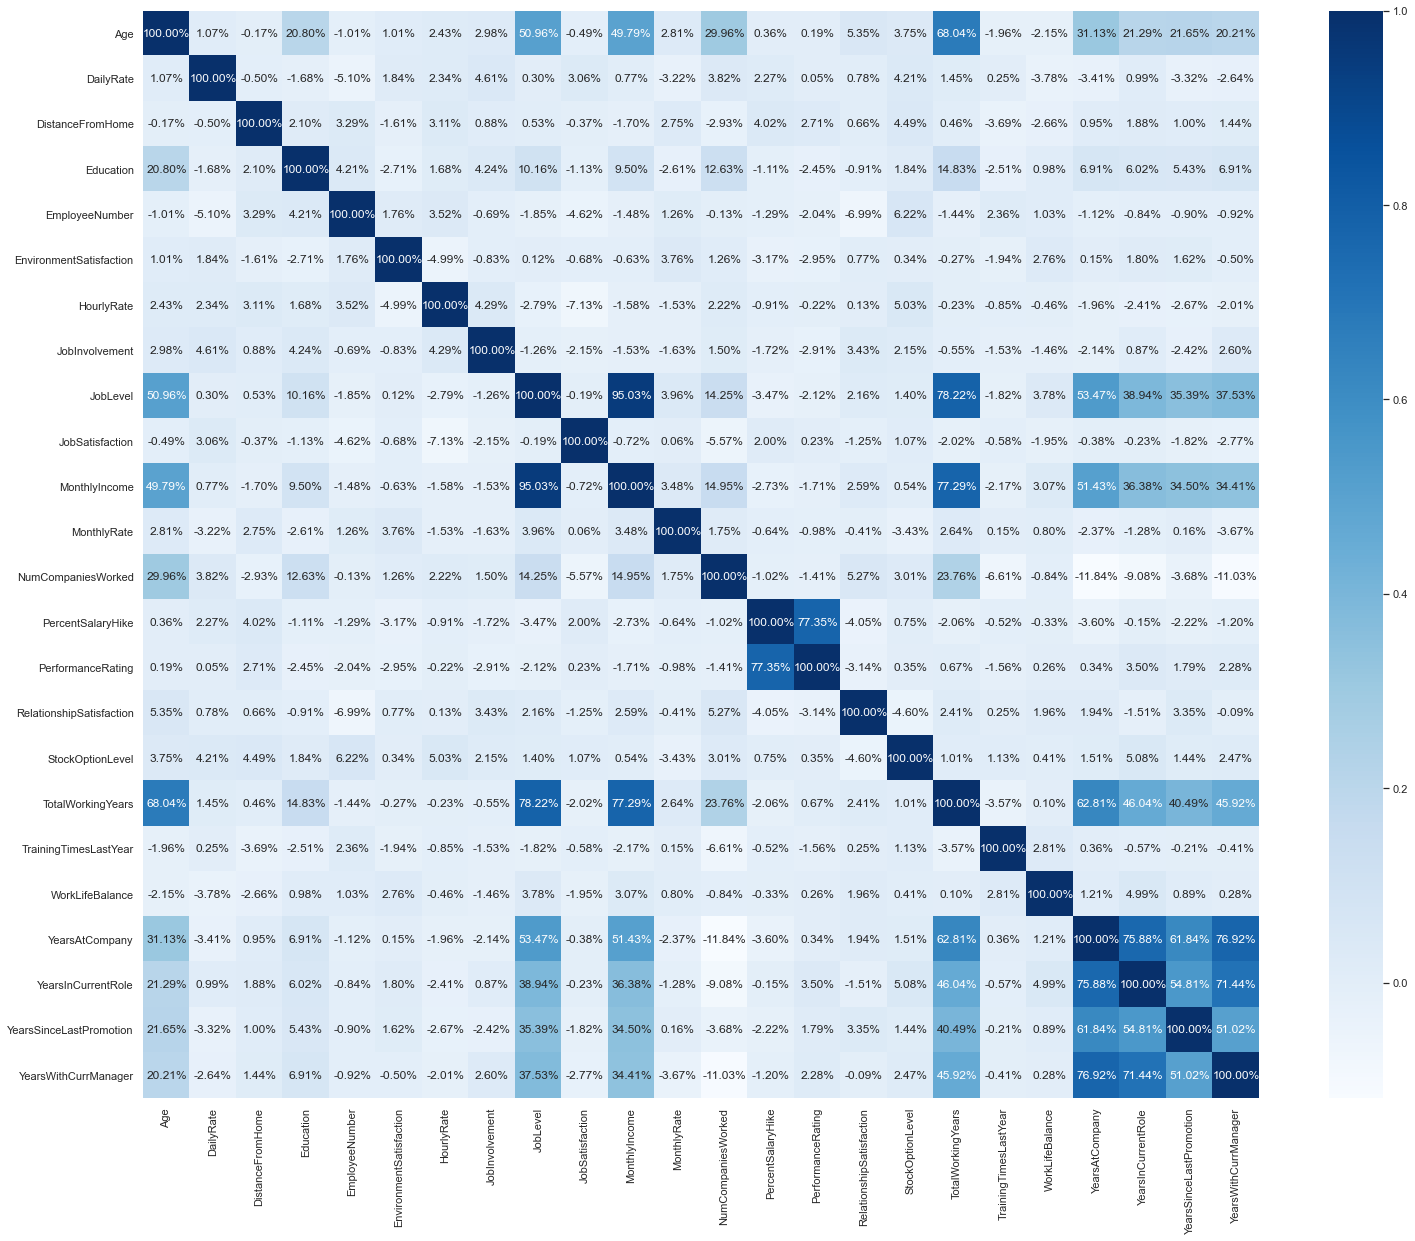

In [275]:
plt.subplots(figsize=(25, 20))
sns.heatmap(hr_df.corr(), annot=True, fmt='.2%', cmap='Blues');
# sns.heatmap(hr_df[['HourlyRate','DailyRate','MonthlyRate']].corr(), annot=True, fmt='.2%', cmap='Blues')

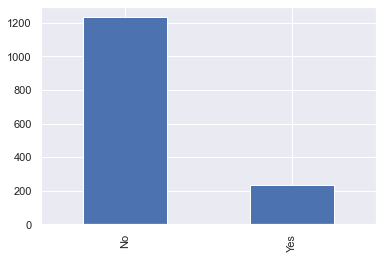

In [276]:
ax = hr_df['Attrition'].value_counts().plot(kind='bar');

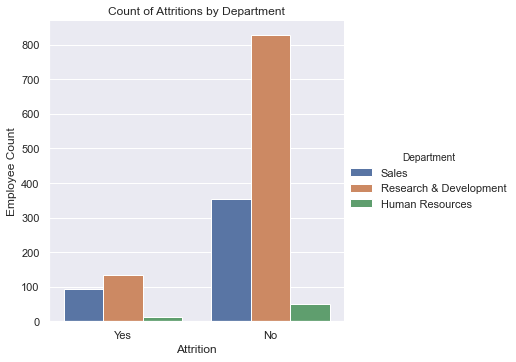

In [277]:
fig = sns.catplot(x='Attrition', kind='count', hue='Department' ,data=hr_df )
fig.set(xlabel='Attrition', ylabel="Employee Count", title="Count of Attritions by Department");

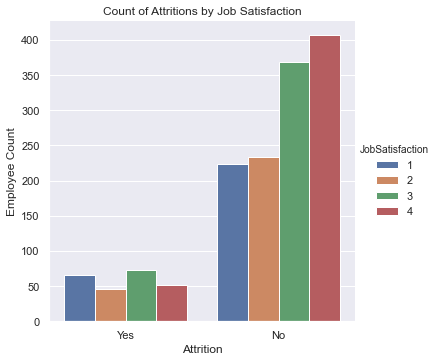

In [278]:
fig = sns.catplot(x='Attrition', kind='count', hue='JobSatisfaction' ,data=hr_df )
fig.set(xlabel='Attrition', ylabel="Employee Count", title="Count of Attritions by Job Satisfaction");

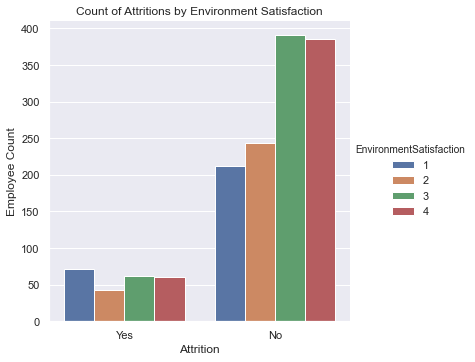

In [279]:
fig = sns.catplot(x='Attrition', kind='count', hue='EnvironmentSatisfaction' ,data=hr_df )
fig.set(xlabel='Attrition', ylabel="Employee Count", title="Count of Attritions by Environment Satisfaction");

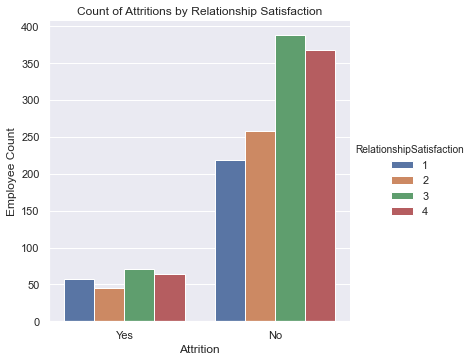

In [280]:
fig = sns.catplot(x='Attrition', kind='count', hue='RelationshipSatisfaction' ,data=hr_df )
fig.set(xlabel='Attrition', ylabel="Employee Count", title="Count of Attritions by Relationship Satisfaction");

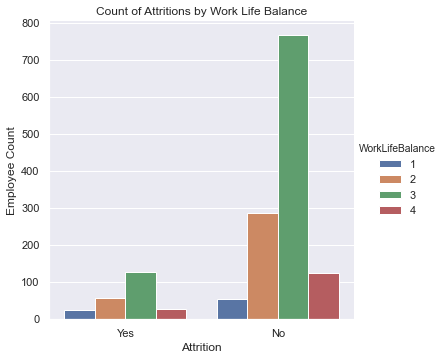

In [281]:
fig = sns.catplot(x='Attrition', kind='count', hue='WorkLifeBalance' ,data=hr_df )
fig.set(xlabel='Attrition', ylabel="Employee Count", title="Count of Attritions by Work Life Balance");

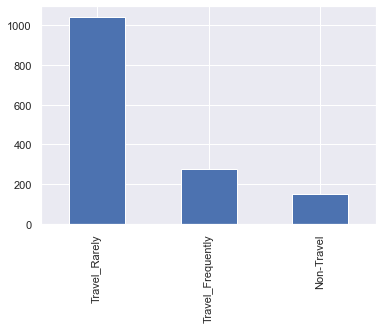

In [282]:
hr_df['BusinessTravel'].value_counts().plot(kind='bar')

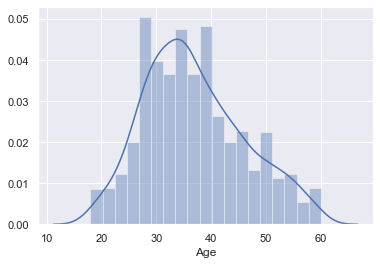

In [283]:
sns.distplot(hr_df['Age'])

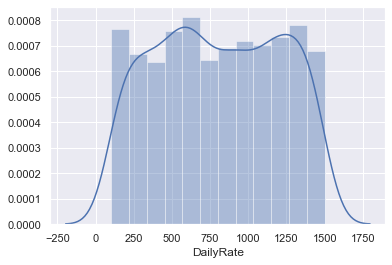

In [284]:
sns.distplot(hr_df['DailyRate'])

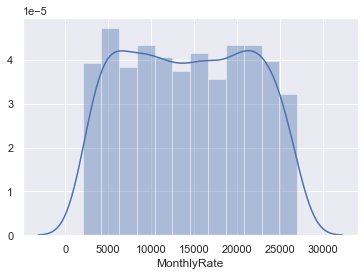

In [285]:
sns.distplot(hr_df['MonthlyRate'])

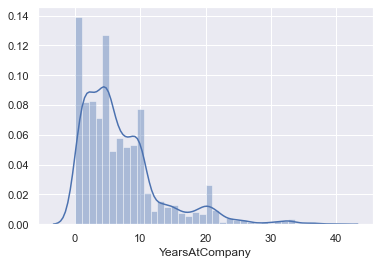

In [286]:
sns.distplot(hr_df['YearsAtCompany'])

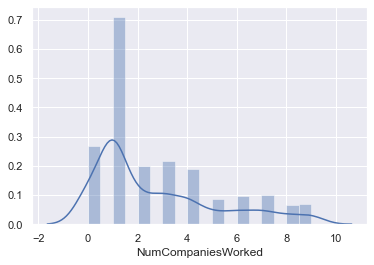

In [287]:
sns.distplot(hr_df['NumCompaniesWorked'])

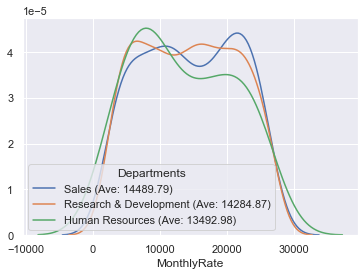

In [288]:
unique_depts = hr_df['Department'].unique()

for dept in unique_depts:
    subset = hr_df[hr_df['Department'] == dept]
    dept_mean = subset['MonthlyRate'].mean()
    dept_label = '{} (Ave: {:.2f})'.format(dept, dept_mean)
    sns.distplot(subset['MonthlyRate'], hist=False, label=dept_label)

plt.legend(title='Departments');

# EDA for those who were Attrited

In [289]:
leaver_df = hr_df[hr_df['Attrition'] == 'Yes']

In [290]:
leaver_df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0


In [291]:
leaver_df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237,237,237.000000,237,237.000000,237.000000,237,237.000000,237.000000,237,237.000000,237.000000,237.000000,237,237.000000,237,237.000000,237.000000,237.000000,237,237,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
unique,NaN,1,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Yes,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Laboratory Technician,NaN,Single,NaN,NaN,NaN,Y,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,237,156,NaN,133,NaN,NaN,89,NaN,NaN,150,NaN,NaN,NaN,62,NaN,120,NaN,NaN,NaN,237,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,33.607595,NaN,NaN,750.362869,NaN,10.632911,2.839662,NaN,1010.345992,2.464135,NaN,65.573840,2.518987,1.637131,NaN,2.468354,NaN,4787.092827,14559.308017,2.940928,NaN,NaN,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,NaN,NaN,401.899519,NaN,8.452525,1.008244,NaN,580.750572,1.169791,NaN,20.099958,0.773405,0.940594,NaN,1.118058,NaN,3640.210367,7208.153264,2.678519,NaN,NaN,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,NaN,NaN,103.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,31.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2326.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,NaN,NaN,408.000000,NaN,3.000000,2.000000,NaN,514.000000,1.000000,NaN,50.000000,2.000000,1.000000,NaN,1.000000,NaN,2373.000000,8870.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,NaN,NaN,699.000000,NaN,9.000000,3.000000,NaN,1017.000000,3.000000,NaN,66.000000,3.000000,1.000000,NaN,3.000000,NaN,3202.000000,14618.000000,1.000000,NaN,NaN,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,NaN,NaN,1092.000000,NaN,17.000000,4.000000,NaN,1486.000000,4.000000,NaN,84.000000,3.000000,2.000000,NaN,3.000000,NaN,5916.000000,21081.000000,5.000000,NaN,NaN,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000


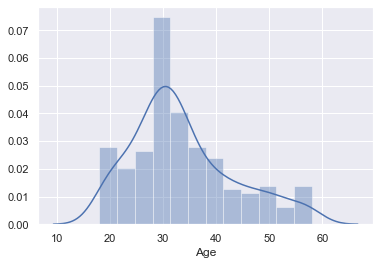

In [292]:
sns.distplot(leaver_df['Age'])

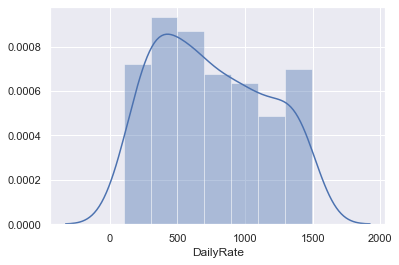

In [293]:
sns.distplot(leaver_df['DailyRate'])

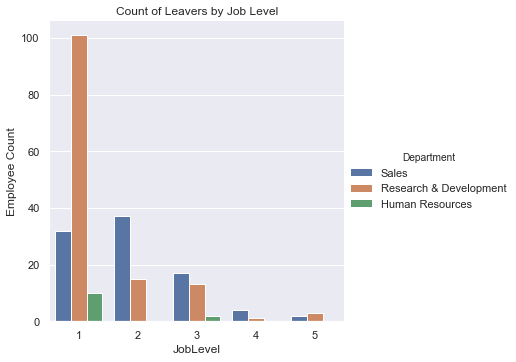

In [294]:
fig = sns.catplot(x='JobLevel', kind='count', hue='Department', data=leaver_df )
fig.set(xlabel='JobLevel', ylabel="Employee Count", title="Count of Leavers by Job Level");

In [295]:
leaver_df[leaver_df['Department'] == 'Research & Development']['JobRole'].value_counts()

Laboratory Technician        62
Research Scientist           47
Manufacturing Director       10
Healthcare Representative     9
Manager                       3
Research Director             2
Name: JobRole, dtype: int64

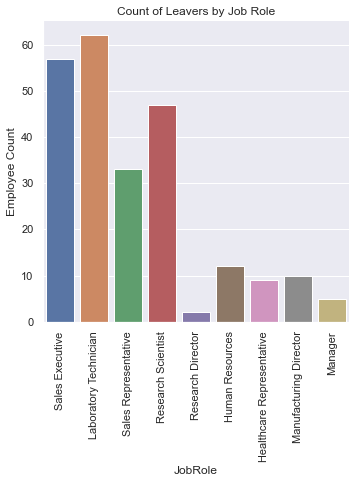

In [296]:
fig = sns.catplot(x='JobRole', kind='count', data=leaver_df )
fig.set(xlabel='JobRole', ylabel="Employee Count", title="Count of Leavers by Job Role")
fig.set_xticklabels(rotation=90);

In [297]:
leaver_df[leaver_df['Department'] == 'Research & Development'].describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,133.000000,133,133,133.000000,133,133.000000,133.000000,133,133.000000,133.000000,133,133.000000,133.000000,133.000000,133,133.000000,133,133.000000,133.000000,133.000000,133,133,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
unique,NaN,1,3,NaN,1,NaN,NaN,4,NaN,NaN,2,NaN,NaN,NaN,6,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Yes,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Laboratory Technician,NaN,Single,NaN,NaN,NaN,Y,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,133,88,NaN,133,NaN,NaN,59,NaN,NaN,90,NaN,NaN,NaN,62,NaN,66,NaN,NaN,NaN,133,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,33.473684,NaN,NaN,754.548872,NaN,10.263158,2.827068,NaN,949.744361,2.473684,NaN,66.834586,2.556391,1.421053,NaN,2.458647,NaN,4108.075188,14145.345865,2.924812,NaN,NaN,15.308271,3.195489,2.518797,0.518797,8.082707,2.586466,2.578947,4.954887,2.706767,1.872180,2.849624
std,9.902233,NaN,NaN,405.924561,NaN,8.386402,1.026256,NaN,557.743053,1.190740,NaN,20.579182,0.711523,0.872219,NaN,1.118110,NaN,3393.026241,7164.570549,2.675999,NaN,NaN,4.013576,0.398076,1.165160,0.812791,7.332002,1.256063,0.863489,6.048872,3.192752,3.262304,3.090788
min,18.000000,NaN,NaN,103.000000,NaN,1.000000,1.000000,NaN,4.000000,1.000000,NaN,31.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2396.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,NaN,NaN,381.000000,NaN,3.000000,2.000000,NaN,440.000000,1.000000,NaN,50.000000,2.000000,1.000000,NaN,1.000000,NaN,2362.000000,8269.000000,1.000000,NaN,NaN,12.000000,3.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,NaN,NaN,699.000000,NaN,8.000000,3.000000,NaN,994.000000,3.000000,NaN,67.000000,3.000000,1.000000,NaN,3.000000,NaN,2759.000000,14180.000000,1.000000,NaN,NaN,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,38.000000,NaN,NaN,1097.000000,NaN,16.000000,4.000000,NaN,1389.000000,4.000000,NaN,85.000000,3.000000,1.000000,NaN,3.000000,NaN,4213.000000,20366.000000,5.000000,NaN,NaN,18.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000


# Plotting Employees

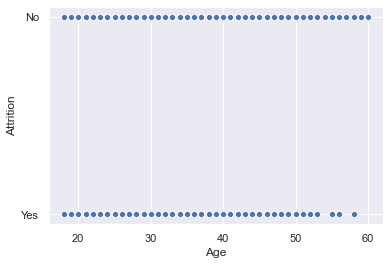

In [298]:
sns.scatterplot(x='Age', y='Attrition', data=hr_df)

# Train Test Split

In [299]:
target = hr_df['Attrition']
features = hr_df.drop(['Attrition'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=432)

Must retain the order of columns for usage later on.

In [300]:
train_df = x_train.copy()
train_df.insert(0, 'Attrition', y_train)
train_df.reset_index(drop=True, inplace=True)
train_df.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,31,Travel_Rarely,1274,Research & Development,9,1,Life Sciences,581,3,Male,33,3,3,Manufacturing Director,2,Divorced,10648,14394,1,Y,No,25,4,4,1,13,6,4,13,8,0,8
1,No,28,Travel_Rarely,640,Research & Development,1,3,Technical Degree,1301,4,Male,84,3,1,Research Scientist,1,Single,2080,4732,2,Y,No,11,3,2,0,5,2,2,3,2,1,2


Quick sanity check if the re-inserted ```Attrition``` column still has the same values with the original ```hr_df```. Join the train_df and hr_df on ```EmployeeNumber``` resulting to a new dataframe, ```check_train_df```.

In [301]:
check_train_df = pd.merge(left=train_df, right=hr_df, on=['EmployeeNumber'])

 If ```check_train_df.Attrition``` is not equal with ```hr_df.Attrition``` it should show some rows. Luckily, it didn't, so the reinserted Attrition column in ```train_df``` still retained the original values.

In [302]:
check_train_df[(check_train_df['Attrition_x'] != check_train_df['Attrition_y'])]

,Attrition_x,Age_x,BusinessTravel_x,DailyRate_x,Department_x,DistanceFromHome_x,Education_x,EducationField_x,EmployeeNumber,EnvironmentSatisfaction_x,Gender_x,HourlyRate_x,JobInvolvement_x,JobLevel_x,JobRole_x,JobSatisfaction_x,MaritalStatus_x,MonthlyIncome_x,MonthlyRate_x,NumCompaniesWorked_x,Over18_x,OverTime_x,PercentSalaryHike_x,PerformanceRating_x,RelationshipSatisfaction_x,StockOptionLevel_x,TotalWorkingYears_x,TrainingTimesLastYear_x,WorkLifeBalance_x,YearsAtCompany_x,YearsInCurrentRole_x,YearsSinceLastPromotion_x,YearsWithCurrManager_x,Age_y,Attrition_y,BusinessTravel_y,DailyRate_y,Department_y,DistanceFromHome_y,Education_y,EducationField_y,EnvironmentSatisfaction_y,Gender_y,HourlyRate_y,JobInvolvement_y,JobLevel_y,JobRole_y,JobSatisfaction_y,MaritalStatus_y,MonthlyIncome_y,MonthlyRate_y,NumCompaniesWorked_y,Over18_y,OverTime_y,PercentSalaryHike_y,PerformanceRating_y,RelationshipSatisfaction_y,StockOptionLevel_y,TotalWorkingYears_y,TrainingTimesLastYear_y,WorkLifeBalance_y,YearsAtCompany_y,YearsInCurrentRole_y,YearsSinceLastPromotion_y,YearsWithCurrManager_y


For the ```test_df```, do the same method as that for ```train_df```. A quick check ensured that the reinserted Attrition column still has the original values.

In [303]:
test_df = x_test.copy()
test_df.insert(0, 'Attrition', y_test)
test_df.reset_index(drop=True, inplace=True)
test_df.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,50,Travel_Rarely,869,Sales,3,2,Marketing,47,1,Male,86,2,1,Sales Representative,3,Married,2683,3810,1,Y,Yes,14,3,3,0,3,2,3,3,2,0,2
1,No,27,Travel_Rarely,1103,Research & Development,14,3,Life Sciences,1244,1,Male,42,3,1,Research Scientist,1,Married,2235,14377,1,Y,Yes,14,3,4,2,9,3,2,9,7,6,8


In [304]:
check_test_df = pd.merge(left=test_df, right=hr_df, on=['EmployeeNumber'])
check_test_df[(check_test_df['Attrition_x'] != check_test_df['Attrition_y'])]

,Attrition_x,Age_x,BusinessTravel_x,DailyRate_x,Department_x,DistanceFromHome_x,Education_x,EducationField_x,EmployeeNumber,EnvironmentSatisfaction_x,Gender_x,HourlyRate_x,JobInvolvement_x,JobLevel_x,JobRole_x,JobSatisfaction_x,MaritalStatus_x,MonthlyIncome_x,MonthlyRate_x,NumCompaniesWorked_x,Over18_x,OverTime_x,PercentSalaryHike_x,PerformanceRating_x,RelationshipSatisfaction_x,StockOptionLevel_x,TotalWorkingYears_x,TrainingTimesLastYear_x,WorkLifeBalance_x,YearsAtCompany_x,YearsInCurrentRole_x,YearsSinceLastPromotion_x,YearsWithCurrManager_x,Age_y,Attrition_y,BusinessTravel_y,DailyRate_y,Department_y,DistanceFromHome_y,Education_y,EducationField_y,EnvironmentSatisfaction_y,Gender_y,HourlyRate_y,JobInvolvement_y,JobLevel_y,JobRole_y,JobSatisfaction_y,MaritalStatus_y,MonthlyIncome_y,MonthlyRate_y,NumCompaniesWorked_y,Over18_y,OverTime_y,PercentSalaryHike_y,PerformanceRating_y,RelationshipSatisfaction_y,StockOptionLevel_y,TotalWorkingYears_y,TrainingTimesLastYear_y,WorkLifeBalance_y,YearsAtCompany_y,YearsInCurrentRole_y,YearsSinceLastPromotion_y,YearsWithCurrManager_y


# One-Hot Encoding the Training Dataset

In [305]:
nominal_categories = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
                      'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

In [306]:
ohe = OneHotEncoder(categories='auto', drop='first')
ohe.fit(train_df[nominal_categories])
train_arr = ohe.transform(train_df[nominal_categories]).toarray()

In [307]:
train_cols = ohe.get_feature_names()
train_cols_list = train_cols.tolist()
print(train_cols_list)

['x0_Yes', 'x1_Travel_Frequently', 'x1_Travel_Rarely', 'x2_Research & Development', 'x2_Sales', 'x3_Life Sciences', 'x3_Marketing', 'x3_Medical', 'x3_Other', 'x3_Technical Degree', 'x4_Male', 'x5_Human Resources', 'x5_Laboratory Technician', 'x5_Manager', 'x5_Manufacturing Director', 'x5_Research Director', 'x5_Research Scientist', 'x5_Sales Executive', 'x5_Sales Representative', 'x6_Married', 'x6_Single', 'x8_Yes']


In [308]:
new_cols_list = []
for index, value in enumerate(train_cols_list):
    new_cols_list.append(nominal_categories[int(value[1])] + value[2:])
    continue
print(new_cols_list)

['Attrition_Yes', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']


In [309]:
train_ohe_df = pd.DataFrame(train_arr, columns=new_cols_list)
train_ohe_df.head(2)

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [310]:
train_df = pd.merge(left=train_df, right=train_ohe_df, left_index=True, right_index=True)

Drop the original nominal category columns so that only the one-hot encoded columns remain

In [311]:
train_df.drop(nominal_categories, axis=1, inplace=True)

Drop ```EmployeeNumber``` column since they will affect the model even if they are meaningless.

In [312]:
train_df.drop(['EmployeeNumber'], axis=1, inplace=True)

In [313]:
train_df.head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,31,1274,9,1,3,33,3,3,2,10648,14394,1,25,4,4,1,13,6,4,13,8,0,8,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28,640,1,3,4,84,3,1,1,2080,4732,2,11,3,2,0,5,2,2,3,2,1,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Applying OHE to the Test Dataset

In [314]:
test_arr = ohe.transform(test_df[nominal_categories]).toarray()

In [315]:
test_cols = ohe.get_feature_names()
test_cols_list = test_cols.tolist()

In [316]:
new_cols_list = []
for index, value in enumerate(test_cols_list):
    new_cols_list.append(nominal_categories[int(value[1])] + value[2:])
    continue

In [317]:
test_ohe_df = pd.DataFrame(test_arr, columns=new_cols_list)
test_ohe_df.head(2)

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [318]:
test_df = pd.merge(left=test_df, right=test_ohe_df, left_index=True, right_index=True)

In [319]:
test_df.drop(nominal_categories, axis=1, inplace=True)

In [320]:
test_df.drop(['EmployeeNumber'], axis=1, inplace=True)

# Logistic Regression

In [321]:
def confusion_matrix(features, actual_target_values, logit_model):
        # Predict from the features using the fitted logit_model
        predicted_values = logit_model.predict(features)
        
        # Specify the bins 
        bins = np.array([0, 0.5, 1])
        
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        confusion_matrix = np.histogram2d(actual_target_values, predicted_values, bins=bins)[0]
        
        # Calculate the accuracy
        accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / confusion_matrix.sum()

        return confusion_matrix, accuracy

In [322]:
def prepare_target_and_features(dataframe, target_column, cols_to_drop):
    
    # Create an initial blank list in order to not change the original cols_to_drop value
    drop_cols = []
    
    if isinstance(target_column, str):
        target = dataframe[target_column]
        
        if cols_to_drop:
            drop_cols = cols_to_drop.copy()
            drop_cols.append(target_column)
            features = dataframe.drop(drop_cols, axis=1)
        else:
            features = dataframe.drop([target_column], axis=1)
            
    elif isinstance(target_column, pd.core.series.Series):
        target = target_column
        if cols_to_drop:
            features = dataframe.drop(cols_to_drop, axis=1)
        else:
            features = dataframe
    
    # Check if const column exists. If not, add_constant
    if 'const' not in features.columns:
        features = sm.add_constant(features)
        
    return target, features

In [323]:
def fit_model(dataframe, target_column, cols_to_drop):
    
    target, features = prepare_target_and_features(dataframe, target_column, cols_to_drop)
        
    # Create a Logit object
    logit = sm.Logit(target, features)
    
    # Create a fitted logit model
    logit_model = logit.fit()
    
    # Call the confusion matrix function
    conf_matrix, accuracy = confusion_matrix(features, target, logit_model)
    
    return logit_model, conf_matrix, accuracy

In [324]:
def predict_from_test(test_df, target_column, cols_to_drop, logit_model):
    
    test_target, test_features = prepare_target_and_features(test_df, target_column, cols_to_drop)
    conf_matrix, accuracy = confusion_matrix(test_features, test_target, logit_model)
    
    return conf_matrix, accuracy

In [325]:
def print_confusion_matrix_accuracy(conf_matrix, accuracy):
    print(conf_matrix)
    print('Accuracy: {}%2d'.format(accuracy))

## Method 1: Using the Training and Test Datasets as They are

In [326]:
m1_model, conf_matrix, acc = fit_model(train_df, 'Attrition_Yes', None)

         Current function value: 0.281020
         Iterations: 35


c:\users\dana\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [327]:
m1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1131
Method:                           MLE   Df Model:                           44
Date:                Fri, 17 Apr 2020   Pseudo R-squ.:                  0.3521
Time:                        00:18:30   Log-Likelihood:                -330.48
converged:                      False   LL-Null:                       -510.10
Covariance Type:            nonrobust   LLR p-value:                 4.779e-51
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -13.1296   2091.072     -0.006      0.995   -4111.555    4085.296
Age                                  -0.0365      0.015     -2.357      0.018      -0.067      -0.006
DailyRate                            -0.0003      0.000     -1.175      0.240      -0.001       0.000
DistanceFromHome                      0.0513      0.012      4.175      0.000       0.027       0.075
Education                             0.0353      0.101      0.351      0.725      -0.162       0.232
EnvironmentSatisfaction              -0.4787      0.096     -4.986      0.000      -0.667      -0.291
HourlyRate                            0.0037      0.005      0.726      0.468      -0.006       0.014
JobInvolvement                       -0.5206      0.141     -3.704      0.000      -0.796      -0.245
JobLevel                              0.3065      0.364      0.842      0.400      -0.407       1.020
JobSatisfaction                      -0.3370      0.094     -3.569      0.000      -0.522      -0.152
MonthlyIncome                     -5.593e-05   9.63e-05     -0.581      0.562      -0.000       0.000
MonthlyRate                          1.5e-05   1.44e-05      1.038      0.299   -1.33e-05    4.33e-05
NumCompaniesWorked                    0.2288      0.044      5.242      0.000       0.143       0.314
PercentSalaryHike                    -0.0208      0.046     -0.455      0.649      -0.111       0.069
PerformanceRating                     0.1351      0.459      0.294      0.768      -0.764       1.034
RelationshipSatisfaction             -0.2317      0.095     -2.451      0.014      -0.417      -0.046
StockOptionLevel                     -0.3107      0.178     -1.748      0.080      -0.659       0.038
TotalWorkingYears                    -0.0675      0.034     -1.977      0.048      -0.134      -0.001
TrainingTimesLastYear                -0.2516      0.084     -2.978      0.003      -0.417      -0.086
WorkLifeBalance                      -0.4106      0.145     -2.826      0.005      -0.695      -0.126
YearsAtCompany                        0.1066      0.044      2.406      0.016       0.020       0.193
YearsInCurrentRole                   -0.1617      0.053     -3.070      0.002      -0.265      -0.058
YearsSinceLastPromotion               0.1651      0.049      3.383      0.001       0.069       0.261
YearsWithCurrManager                 -0.1479      0.053     -2.797      0.005      -0.252      -0.044
BusinessTravel_Travel_Frequently      1.7914      0.478      3.749      0.000       0.855       2.728
BusinessTravel_Travel_Rarely          1.0925      0.439      2.489      0.013       0.232       1.953
Department_Research & Development    14.2948   2091.071      0.007      0.995   -4084.129    4112.719
Department_Sales                     13.2003   2091.071      0.006      0.995   -4085.224    4111.625
EducationField_Life Sciences         -0.1984      0.904     -0.219      0.826  

In [328]:
print_confusion_matrix_accuracy(conf_matrix, acc)

[[969.  23.]
 [ 96.  88.]]
Accuracy: 0.8988095238095238%2d


In [329]:
test_conf_matrix, test_acc = predict_from_test(test_df, 'Attrition_Yes', None, m1_model)

In [330]:
print_confusion_matrix_accuracy(test_conf_matrix, test_acc)

[[230.  11.]
 [ 36.  17.]]
Accuracy: 0.8401360544217688%2d


# Method 2: Scale the Dataset before Logistic Regression

# Standard Scaler on Training Dataset

In [331]:
scaled_train_df = train_df.copy()

In [332]:
scaler = StandardScaler()
scaler.fit(scaled_train_df.drop(['Attrition_Yes'], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [333]:
scaled_train_df = scaler.transform(train_df.drop(['Attrition_Yes'], axis=1))

In [334]:
scaled_train_df = pd.DataFrame(scaled_train_df, columns=train_df.drop(['Attrition_Yes'], axis=1).columns)
scaled_train_df = pd.merge(left=scaled_train_df, right=train_df['Attrition_Yes'], left_index=True, right_index=True)
scaled_train_df.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,-0.689868,1.143634,-0.016933,-1.917270,0.236912,-1.614977,0.392794,0.801481,-0.649704,0.837139,0.020201,-0.695759,2.687165,2.367856,1.190677,0.211383,0.199999,2.490413,1.758492,0.960155,1.019052,-0.677871,1.071443,-0.483733,0.640369,0.739844,-0.669534,1.177028,-0.352538,-0.669534,-0.235914,-0.311472,0.820263,-0.194814,-0.455403,-0.287877,3.008535,-0.243843,-0.482394,-0.541968,-0.239904,-0.904223,-0.674867,-0.632456,0.0
1,-1.021999,-0.409053,-1.006426,0.071887,1.156410,0.906036,0.392794,-0.981947,-1.562550,-0.952069,-1.338901,-0.295264,-1.159252,-0.422323,-0.659041,-0.944831,-0.823161,-0.617813,-1.093903,-0.655906,-0.615880,-0.372790,-0.601146,-0.483733,0.640369,0.739844,-0.669534,-0.849597,-0.352538,-0.669534,-0.235914,3.210560,0.820263,-0.194814,-0.455403,-0.287877,-0.332388,-0.243843,2.072992,-0.541968,-0.239904,-0.904223,1.481773,-0.632456,0.0
2,1.967178,0.695461,-0.882739,-1.917270,1.156410,-0.033165,0.392794,0.801481,-0.649704,0.905633,0.219804,0.105232,0.763957,-0.422323,-0.659041,0.211383,1.478949,0.936300,0.332294,-0.655906,-0.615880,-0.372790,-0.601146,2.067255,-1.561601,0.739844,-0.669534,1.177028,-0.352538,-0.669534,-0.235914,-0.311472,0.820263,-0.194814,-0.455403,-0.287877,3.008535,-0.243843,-0.482394,-0.541968,-0.239904,1.105922,-0.674867,-0.632456,0.0


# Scale the Test Dataset

In [335]:
scaled_test_df = scaler.transform(test_df.drop(['Attrition_Yes'], axis=1))

In [336]:
scaled_test_df = pd.DataFrame(scaled_test_df, columns=test_df.drop(['Attrition_Yes'], axis=1).columns)
scaled_test_df = pd.merge(left=scaled_test_df, right=test_df['Attrition_Yes'], left_index=True, right_index=True)
scaled_test_df.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,1.413627,0.151775,-0.759053,-0.922691,-1.602085,1.004900,-1.002752,-0.981947,0.263142,-0.826148,-1.468594,-0.695759,-0.335020,-0.422323,0.265818,-0.944831,-1.078951,-0.617813,0.332294,-0.655906,-0.615880,-0.677871,-0.601146,-0.483733,0.640369,-1.351637,1.493576,-0.849597,2.836574,-0.669534,-0.235914,-0.311472,0.820263,-0.194814,-0.455403,-0.287877,-0.332388,-0.243843,-0.482394,-0.541968,4.168333,1.105922,-0.674867,1.581139,1.0
1,-1.132709,0.724849,0.601500,0.071887,-1.602085,-1.170092,0.392794,-0.981947,-1.562550,-0.919701,0.017809,-0.695759,-0.335020,-0.422323,1.190677,1.367596,-0.311581,0.159244,-1.093903,0.313730,0.746563,1.152614,1.071443,-0.483733,0.640369,0.739844,-0.669534,1.177028,-0.352538,-0.669534,-0.235914,-0.311472,0.820263,-0.194814,-0.455403,-0.287877,-0.332388,-0.243843,2.072992,-0.541968,-0.239904,1.105922,-0.674867,1.581139,0.0
2,-0.136317,-0.607425,0.354126,1.066465,0.236912,0.510583,0.392794,-0.090233,0.263142,-0.412675,-0.257331,2.508208,-0.884508,-0.422323,-0.659041,1.367596,-0.567371,-0.617813,0.332294,-0.655906,-0.615880,-0.372790,-0.879911,-0.483733,0.640369,0.739844,-0.669534,1.177028,-0.352538,-0.669534,-0.235914,-0.311472,-1.219122,-0.194814,-0.455403,-0.287877,3.008535,-0.243843,-0.482394,-0.541968,-0.239904,1.105922,-0.674867,1.581139,0.0


## Logistic Regression on Scaled Data

In [337]:
m2_model, conf_matrix, acc = fit_model(scaled_train_df, 'Attrition_Yes', None)

         Current function value: 0.281020
         Iterations: 35


c:\users\dana\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [338]:
m2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1131
Method:                           MLE   Df Model:                           44
Date:                Fri, 17 Apr 2020   Pseudo R-squ.:                  0.3521
Time:                        00:18:31   Log-Likelihood:                -330.48
converged:                      False   LL-Null:                       -510.10
Covariance Type:            nonrobust   LLR p-value:                 4.779e-51
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.9046     63.822     -0.046      0.964    -127.993     122.184
Age                                  -0.3293      0.140     -2.357      0.018      -0.603      -0.055
DailyRate                            -0.1204      0.102     -1.175      0.240      -0.321       0.080
DistanceFromHome                      0.4150      0.099      4.175      0.000       0.220       0.610
Education                             0.0355      0.101      0.351      0.725      -0.163       0.234
EnvironmentSatisfaction              -0.5206      0.104     -4.986      0.000      -0.725      -0.316
HourlyRate                            0.0755      0.104      0.726      0.468      -0.128       0.279
JobInvolvement                       -0.3730      0.101     -3.704      0.000      -0.570      -0.176
JobLevel                              0.3437      0.408      0.842      0.400      -0.456       1.144
JobSatisfaction                      -0.3692      0.103     -3.569      0.000      -0.572      -0.166
MonthlyIncome                        -0.2678      0.461     -0.581      0.562      -1.172       0.636
MonthlyRate                           0.1066      0.103      1.038      0.299      -0.095       0.308
NumCompaniesWorked                    0.5712      0.109      5.242      0.000       0.358       0.785
PercentSalaryHike                    -0.0759      0.167     -0.455      0.649      -0.403       0.251
PerformanceRating                     0.0484      0.164      0.294      0.768      -0.274       0.371
RelationshipSatisfaction             -0.2506      0.102     -2.451      0.014      -0.451      -0.050
StockOptionLevel                     -0.2687      0.154     -1.748      0.080      -0.570       0.033
TotalWorkingYears                    -0.5279      0.267     -1.977      0.048      -1.051      -0.005
TrainingTimesLastYear                -0.3238      0.109     -2.978      0.003      -0.537      -0.111
WorkLifeBalance                      -0.2879      0.102     -2.826      0.005      -0.488      -0.088
YearsAtCompany                        0.6599      0.274      2.406      0.016       0.122       1.197
YearsInCurrentRole                   -0.5934      0.193     -3.070      0.002      -0.972      -0.215
YearsSinceLastPromotion               0.5411      0.160      3.383      0.001       0.228       0.855
YearsWithCurrManager                 -0.5307      0.190     -2.797      0.005      -0.903      -0.159
BusinessTravel_Travel_Frequently      0.7022      0.187      3.749      0.000       0.335       1.069
BusinessTravel_Travel_Rarely          0.4961      0.199      2.489      0.013       0.105       0.887
Department_Research & Development     8.1576   3987.298      0.002      0.998   -7806.803    7823.118
Department_Sales                      7.3814   3855.262      0.002      0.998   -7548.794    7563.557
EducationField_Life Sciences         -0.0979      0.446     -0.219      0.826  

In [339]:
print_confusion_matrix_accuracy(conf_matrix, acc)

[[969.  23.]
 [ 96.  88.]]
Accuracy: 0.8988095238095238%2d


In [340]:
test_conf_matrix, test_acc = predict_from_test(scaled_test_df, 'Attrition_Yes', None, m2_model)

In [341]:
print_confusion_matrix_accuracy(test_conf_matrix, test_acc)

[[230.  11.]
 [ 36.  17.]]
Accuracy: 0.8401360544217688%2d


# Method 3: Scaler and SMOTE on the Training Dataset

In [342]:
smote = SMOTE(random_state=18)

In [343]:
train_target = scaled_train_df['Attrition_Yes']
train_scaled_features = scaled_train_df.drop(['Attrition_Yes'], axis=1)

In [344]:
smote_train_feat, smote_train_target = smote.fit_sample(train_scaled_features, train_target)

In [345]:
smote_train_feat

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-0.689868,1.143634,-0.016933,-1.917270,0.236912,-1.614977,0.392794,0.801481,-0.649704,0.837139,0.020201,-0.695759,2.687165,2.367856,1.190677,0.211383,0.199999,2.490413,1.758492,0.960155,1.019052,-0.677871,1.071443,-0.483733,0.640369,0.739844,-0.669534,1.177028,-0.352538,-0.669534,-0.235914,-0.311472,0.820263,-0.194814,-0.455403,-0.287877,3.008535,-0.243843,-0.482394,-0.541968,-0.239904,-0.904223,-0.674867,-0.632456
1,-1.021999,-0.409053,-1.006426,0.071887,1.156410,0.906036,0.392794,-0.981947,-1.562550,-0.952069,-1.338901,-0.295264,-1.159252,-0.422323,-0.659041,-0.944831,-0.823161,-0.617813,-1.093903,-0.655906,-0.615880,-0.372790,-0.601146,-0.483733,0.640369,0.739844,-0.669534,-0.849597,-0.352538,-0.669534,-0.235914,3.210560,0.820263,-0.194814,-0.455403,-0.287877,-0.332388,-0.243843,2.072992,-0.541968,-0.239904,-0.904223,1.481773,-0.632456
2,1.967178,0.695461,-0.882739,-1.917270,1.156410,-0.033165,0.392794,0.801481,-0.649704,0.905633,0.219804,0.105232,0.763957,-0.422323,-0.659041,0.211383,1.478949,0.936300,0.332294,-0.655906,-0.615880,-0.372790,-0.601146,2.067255,-1.561601,0.739844,-0.669534,1.177028,-0.352538,-0.669534,-0.235914,-0.311472,0.820263,-0.194814,-0.455403,-0.287877,3.008535,-0.243843,-0.482394,-0.541968,-0.239904,1.105922,-0.674867,-0.632456
3,-0.136317,-0.923350,-0.882739,1.066465,1.156410,0.362288,0.392794,-0.090233,-0.649704,0.067412,0.748703,0.505728,1.862933,2.367856,1.190677,0.211383,0.455789,-0.617813,0.332294,-0.979119,-1.160857,-0.677871,-1.158676,-0.483733,0.640369,0.739844,-0.669534,-0.849597,-0.352538,-0.669534,4.238837,-0.311472,-1.219122,-0.194814,-0.455403,-0.287877,-0.332388,-0.243843,2.072992,-0.541968,-0.239904,1.105922,-0.674867,1.581139
4,1.745757,-1.726632,1.714679,1.066465,1.156410,0.312857,0.392794,1.693195,1.175987,1.594544,0.837743,1.306720,0.763957,-0.422323,0.265818,-0.944831,2.757900,-2.171925,0.332294,0.798548,1.291540,0.237371,1.071443,-0.483733,0.640369,0.739844,-0.669534,1.177028,-0.352538,-0.669534,-0.235914,-0.311472,-1.219122,-0.194814,-0.455403,-0.287877,-0.332388,4.100998,-0.482394,-0.541968,-0.239904,-0.904223,1.481773,-0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,-1.332802,-1.368756,-0.480704,0.091047,0.254625,-0.952368,-0.975868,-0.090233,0.263142,-0.191482,1.777704,-0.703475,-1.122202,-0.422323,1.172860,-0.922557,-0.697730,-1.409839,0.304820,-0.177315,-0.081401,-0.660239,-0.327751,-0.434590,0.597949,-1.351637,1.493576,-0.849597,2.836574,-0.669534,-0.235914,-0.311472,0.780975,-0.194814,-0.455403,-0.287877,-0.332388,-0.243843,-0.482394,1.845127,-0.239904,-0.865499,1.440227,1.581139
1980,-0.535012,-1.147349,1.650331,-0.405262,-1.160956,-0.826073,-0.276719,-0.554147,0.263142,-0.562116,-0.114296,0.313590,-0.895635,-0.422323,-1.102741,-0.944831,-0.506013,-0.990605,0.332294,-0.642816,-0.877333,-0.677871,-0.879911,-0.483733,0.640369,0.739844,-0.669534,1.177028,-0.352538,-0.669534,-0.235914,-0.311472,-0.240727,-0.194814,-0.455403,-0.287877,1.270419,-0.243843,0

In [346]:
smote_train_target.value_counts()

1.0    992
0.0    992
Name: Attrition_Yes, dtype: int64

In [347]:
type(smote_train_target)

pandas.core.series.Series

## Train Model on Scaled and Balanced Training Dataset

In [348]:
m3_model, conf_matrix, acc = fit_model(smote_train_feat, smote_train_target, None)

         Current function value: 0.410989
         Iterations: 35


c:\users\dana\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [349]:
m3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1984
Model:                          Logit   Df Residuals:                     1939
Method:                           MLE   Df Model:                           44
Date:                Fri, 17 Apr 2020   Pseudo R-squ.:                  0.4071
Time:                        00:18:32   Log-Likelihood:                -815.40
converged:                      False   LL-Null:                       -1375.2
Covariance Type:            nonrobust   LLR p-value:                7.910e-206
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.3947     42.746     -0.033      0.974     -85.176      82.387
Age                                  -0.2356      0.090     -2.615      0.009      -0.412      -0.059
DailyRate                            -0.1148      0.069     -1.654      0.098      -0.251       0.021
DistanceFromHome                      0.4721      0.069      6.867      0.000       0.337       0.607
Education                             0.1121      0.069      1.616      0.106      -0.024       0.248
EnvironmentSatisfaction              -0.6130      0.069     -8.891      0.000      -0.748      -0.478
HourlyRate                            0.1349      0.070      1.933      0.053      -0.002       0.272
JobInvolvement                       -0.3634      0.068     -5.326      0.000      -0.497      -0.230
JobLevel                              1.0997      0.289      3.799      0.000       0.532       1.667
JobSatisfaction                      -0.3936      0.070     -5.640      0.000      -0.530      -0.257
MonthlyIncome                        -0.5683      0.331     -1.716      0.086      -1.217       0.081
MonthlyRate                           0.1176      0.069      1.692      0.091      -0.019       0.254
NumCompaniesWorked                    0.5304      0.075      7.055      0.000       0.383       0.678
PercentSalaryHike                    -0.1401      0.109     -1.287      0.198      -0.354       0.073
PerformanceRating                     0.0217      0.109      0.199      0.842      -0.192       0.235
RelationshipSatisfaction             -0.1234      0.067     -1.854      0.064      -0.254       0.007
StockOptionLevel                     -0.2832      0.093     -3.032      0.002      -0.466      -0.100
TotalWorkingYears                    -0.7569      0.175     -4.320      0.000      -1.100      -0.414
TrainingTimesLastYear                -0.3894      0.071     -5.519      0.000      -0.528      -0.251
WorkLifeBalance                      -0.2509      0.068     -3.707      0.000      -0.384      -0.118
YearsAtCompany                        0.7085      0.170      4.158      0.000       0.375       1.043
YearsInCurrentRole                   -0.5365      0.129     -4.164      0.000      -0.789      -0.284
YearsSinceLastPromotion               0.5218      0.104      5.033      0.000       0.319       0.725
YearsWithCurrManager                 -0.5591      0.120     -4.648      0.000      -0.795      -0.323
BusinessTravel_Travel_Frequently      0.8812      0.132      6.680      0.000       0.623       1.140
BusinessTravel_Travel_Rarely          0.8263      0.141      5.864      0.000       0.550       1.102
Department_Research & Development     8.7395   2670.606      0.003      0.997   -5225.552    5243.031
Department_Sales                      7.7902   2582.172      0.003      0.998   -5053.173    5068.753
EducationField_Life Sciences         -0.3527      0.321     -1.099      0.272  

In [350]:
print_confusion_matrix_accuracy(conf_matrix, acc)

[[791. 201.]
 [165. 827.]]
Accuracy: 0.8155241935483871%2d


In [351]:
test_conf_matrix, test_acc = predict_from_test(scaled_test_df, 'Attrition_Yes', None, m3_model)

In [352]:
print_confusion_matrix_accuracy(test_conf_matrix, test_acc)

[[191.  50.]
 [ 15.  38.]]
Accuracy: 0.7789115646258503%2d


# Method 4: Scaled, Balanced, RFECV and p-values

In [353]:
smote_train_feat.shape

(1984, 44)

In [354]:
log_reg = LogisticRegression()

In [355]:
rfecv = RFECV(estimator=log_reg, cv=StratifiedKFold(), scoring='accuracy')

In [356]:
rfecv.fit(smote_train_feat, smote_train_target)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

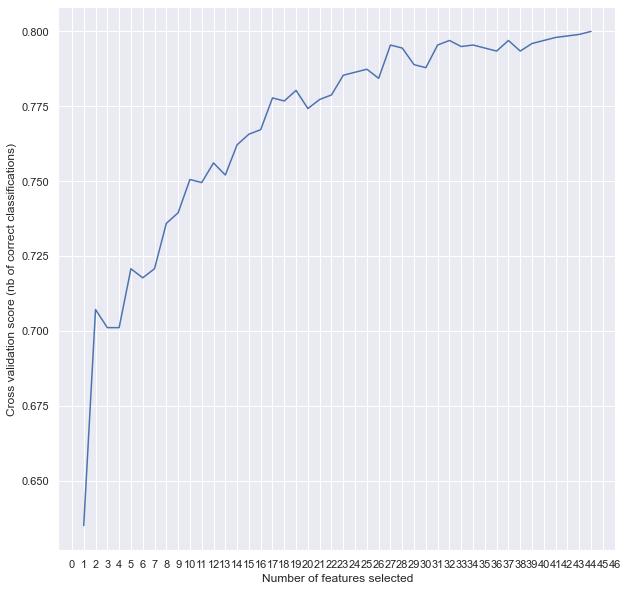

In [357]:
plt.figure(figsize=(10, 10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.xticks(np.arange(0,50,1));
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_);

Based on this plot, the most ideal number of features is 44. However, the ```smote_train_feature``` already has 44 columns.

This list are the columns from the ```m3_model.summary()``` with p-value > 0.05 . Let's try to drop them from the ```smote_train_feature``` and train a new model on it.

In [358]:
insignificant_cols = ['DailyRate', 'Education', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike','PerformanceRating', 
                      'RelationshipSatisfaction', 'Department_Research & Development', 'Department_Sales',
                      'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical',
                      'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources',
                      'JobRole_Manager', 'JobRole_Manufacturing Director']

In [359]:
len(insignificant_cols)

17

## Train Model where Insignificant Columns are Dropped

In [360]:
m4_model, conf_matrix, acc = fit_model(smote_train_feat, smote_train_target, insignificant_cols)

Optimization terminated successfully.
         Current function value: 0.430952
         Iterations 7


In [361]:
m4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1984
Model:                          Logit   Df Residuals:                     1956
Method:                           MLE   Df Model:                           27
Date:                Fri, 17 Apr 2020   Pseudo R-squ.:                  0.3783
Time:                        00:18:38   Log-Likelihood:                -855.01
converged:                       True   LL-Null:                       -1375.2
Covariance Type:            nonrobust   LLR p-value:                6.480e-202
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.1133      0.082    -13.496      0.000      -1.275      -0.952
Age                                 -0.2786      0.087     -3.187      0.001      -0.450      -0.107
DistanceFromHome                     0.4749      0.066      7.201      0.000       0.346       0.604
EnvironmentSatisfaction             -0.5823      0.065     -8.974      0.000      -0.710      -0.455
HourlyRate                           0.0938      0.067      1.408      0.159      -0.037       0.224
JobInvolvement                      -0.3461      0.065     -5.318      0.000      -0.474      -0.219
JobLevel                             0.1492      0.152      0.979      0.328      -0.149       0.448
JobSatisfaction                     -0.3817      0.067     -5.734      0.000      -0.512      -0.251
NumCompaniesWorked                   0.4834      0.071      6.835      0.000       0.345       0.622
StockOptionLevel                    -0.2701      0.088     -3.064      0.002      -0.443      -0.097
TotalWorkingYears                   -0.6905      0.167     -4.138      0.000      -1.018      -0.363
TrainingTimesLastYear               -0.4239      0.069     -6.151      0.000      -0.559      -0.289
WorkLifeBalance                     -0.1966      0.065     -3.047      0.002      -0.323      -0.070
YearsAtCompany                       0.7325      0.159      4.594      0.000       0.420       1.045
YearsInCurrentRole                  -0.5514      0.123     -4.495      0.000      -0.792      -0.311
YearsSinceLastPromotion              0.5407      0.097      5.576      0.000       0.351       0.731
YearsWithCurrManager                -0.5585      0.113     -4.955      0.000      -0.779      -0.338
BusinessTravel_Travel_Frequently     0.9205      0.126      7.331      0.000       0.674       1.167
BusinessTravel_Travel_Rarely         0.8486      0.135      6.283      0.000       0.584       1.113
Gender_Male                          0.1737      0.066      2.634      0.008       0.044       0.303
JobRole_Laboratory Technician        0.4337      0.089      4.886      0.000       0.260       0.608
JobRole_Research Director           -0.2257      0.110     -2.047      0.041      -0.442      -0.010
JobRole_Research Scientist           0.2037      0.094      2.156      0.031       0.018       0.389
JobRole_Sales Executive              0.3471      0.079      4.392      0.000       0.192       0.502
JobRole_Sales Representative         0.4137      0.068      6.074      0.000       0.280       0.547
MaritalStatus_Married                0.3789      0.096      3.961      0.000       0.191       0.566
MaritalStatus_Single                 0.6122      0.114      5.363      0.000       0.389       0.836
OverTime_Yes                         0.8328      0.063     13.265      0.000       0.710       0.956
====================================================================================================
"""

In [362]:
print_confusion_matrix_accuracy(conf_matrix, acc)

[[783. 209.]
 [193. 799.]]
Accuracy: 0.7973790322580645%2d


In [363]:
test_conf_matrix, test_acc = predict_from_test(scaled_test_df, 'Attrition_Yes', insignificant_cols, m4_model)

In [364]:
print_confusion_matrix_accuracy(test_conf_matrix, test_acc)

[[175.  66.]
 [ 15.  38.]]
Accuracy: 0.7244897959183674%2d


## Drop the remaining columns where p-value > 0.05

In [365]:
insignificant_cols.append('HourlyRate')
insignificant_cols.append('JobLevel')

['DailyRate',
 'Education',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Human Resources',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'HourlyRate',
 'JobLevel']

In [366]:
m5_model, conf_matrix, acc = fit_model(smote_train_feat, smote_train_target, insignificant_cols)

Optimization terminated successfully.
         Current function value: 0.431744
         Iterations 7


In [367]:
m5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1984
Model:                          Logit   Df Residuals:                     1958
Method:                           MLE   Df Model:                           25
Date:                Fri, 17 Apr 2020   Pseudo R-squ.:                  0.3771
Time:                        00:19:00   Log-Likelihood:                -856.58
converged:                       True   LL-Null:                       -1375.2
Covariance Type:            nonrobust   LLR p-value:                7.223e-203
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.1054      0.082    -13.455      0.000      -1.266      -0.944
Age                                 -0.2729      0.087     -3.139      0.002      -0.443      -0.103
DistanceFromHome                     0.4776      0.066      7.239      0.000       0.348       0.607
EnvironmentSatisfaction             -0.5816      0.065     -8.967      0.000      -0.709      -0.454
JobInvolvement                      -0.3396      0.065     -5.244      0.000      -0.467      -0.213
JobSatisfaction                     -0.3926      0.066     -5.969      0.000      -0.522      -0.264
NumCompaniesWorked                   0.4706      0.070      6.709      0.000       0.333       0.608
StockOptionLevel                    -0.2605      0.088     -2.960      0.003      -0.433      -0.088
TotalWorkingYears                   -0.6026      0.143     -4.200      0.000      -0.884      -0.321
TrainingTimesLastYear               -0.4165      0.069     -6.064      0.000      -0.551      -0.282
WorkLifeBalance                     -0.1935      0.064     -3.010      0.003      -0.320      -0.067
YearsAtCompany                       0.7471      0.158      4.727      0.000       0.437       1.057
YearsInCurrentRole                  -0.5590      0.122     -4.564      0.000      -0.799      -0.319
YearsSinceLastPromotion              0.5380      0.096      5.603      0.000       0.350       0.726
YearsWithCurrManager                -0.5637      0.112     -5.035      0.000      -0.783      -0.344
BusinessTravel_Travel_Frequently     0.9004      0.124      7.280      0.000       0.658       1.143
BusinessTravel_Travel_Rarely         0.8232      0.133      6.207      0.000       0.563       1.083
Gender_Male                          0.1788      0.066      2.717      0.007       0.050       0.308
JobRole_Laboratory Technician        0.3925      0.078      5.055      0.000       0.240       0.545
JobRole_Research Director           -0.2185      0.107     -2.033      0.042      -0.429      -0.008
JobRole_Research Scientist           0.1584      0.080      1.989      0.047       0.002       0.314
JobRole_Sales Executive              0.3375      0.079      4.296      0.000       0.184       0.492
JobRole_Sales Representative         0.3875      0.063      6.114      0.000       0.263       0.512
MaritalStatus_Married                0.3958      0.095      4.146      0.000       0.209       0.583
MaritalStatus_Single                 0.6358      0.113      5.613      0.000       0.414       0.858
OverTime_Yes                         0.8305      0.063     13.257      0.000       0.708       0.953
====================================================================================================
"""

In [368]:
print_confusion_matrix_accuracy(conf_matrix, acc)

[[781. 211.]
 [182. 810.]]
Accuracy: 0.8019153225806451%2d


In [369]:
test_conf_matrix, test_acc = predict_from_test(scaled_test_df, 'Attrition_Yes', insignificant_cols, m5_model)

In [370]:
print_confusion_matrix_accuracy(test_conf_matrix, test_acc)

[[175.  66.]
 [ 13.  40.]]
Accuracy: 0.7312925170068028%2d
